<a href="https://colab.research.google.com/github/victormattos2013/ml_finished_projects/blob/main/Atividade_Victor_Projects_24_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/victormattos2013/machine_learning/main/projects.csv'

dados = pd.read_csv(url)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
mapa = {

    "unfinished": "nao_finalizado",
    "expected_hours": "horas_previstas",
    "price": "preco"
}
dados = dados.rename(columns=mapa)
dados.head()

,nao_finalizado,horas_previstas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [3]:
# prompt: criar nova coluna com finalizado que todos os dados vai ser contrario a coluna nao finalizado

dados['finalizado'] = dados['nao_finalizado'].map({0: 1, 1: 0})
dados.head()


,nao_finalizado,horas_previstas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


### Plotando gráfico (parte nova aula 24-07)

<Axes: xlabel='horas_previstas', ylabel='preco'>

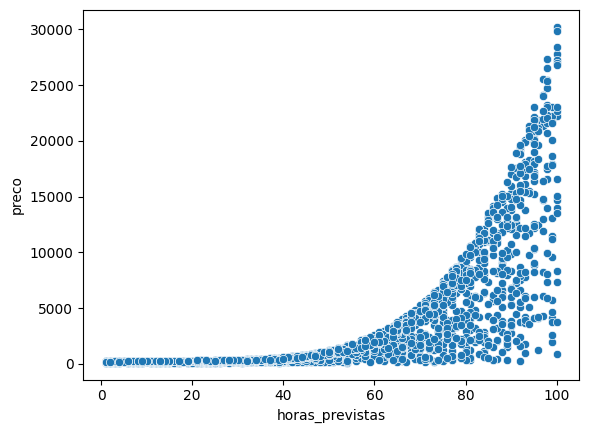

In [7]:
import seaborn as sns
sns.scatterplot(x='horas_previstas', y='preco', data=dados)

<Axes: xlabel='horas_previstas', ylabel='preco'>

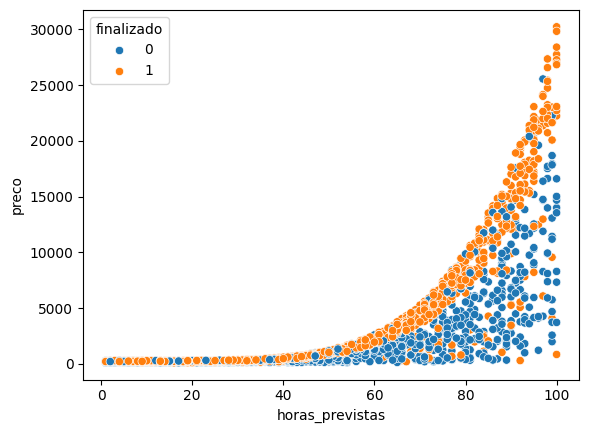

In [9]:
sns.scatterplot(x='horas_previstas', y='preco', hue='finalizado', data=dados)

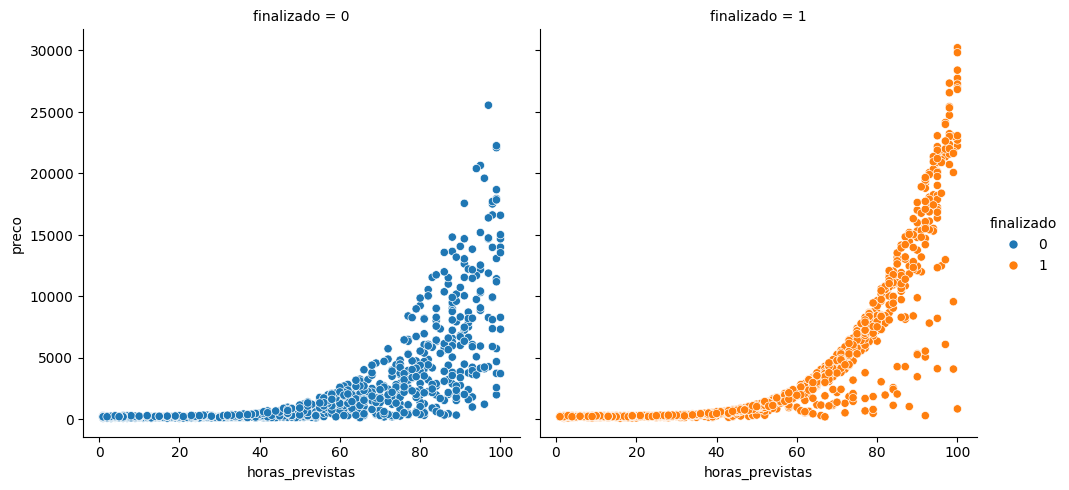

In [10]:
sns.relplot(x='horas_previstas', y='preco', hue='finalizado', col = 'finalizado', data=dados)

In [4]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = dados[['horas_previstas', 'preco']]  # Define your feature matrix
y = dados['finalizado']  # Define your target variable

seed = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, test_size = 0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len (teste_x)))

Treinaremos com 1617 elementos e testaremos com 540 elementos


##MEU CLASSIFICADOR


In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

modelo = LinearSVC() #Cria modelo
modelo.fit(treino_x, treino_y) #Treina
previsoes = modelo.predict(teste_x) #Teste

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" %acuracia)

A acuracia foi 53.52%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


##DUMMY

In [12]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier() #cria modelo
dummy_stratified.fit(treino_x, treino_y) #treina modelo
acuracia = dummy_stratified.score(teste_x, teste_y) * 100 #teste

print("A acuracia do dummy stratified foi %.2f%%" %acuracia)

A acuracia do dummy stratified foi 52.59%


### Plotando dados de teste

<Axes: xlabel='horas_previstas', ylabel='preco'>

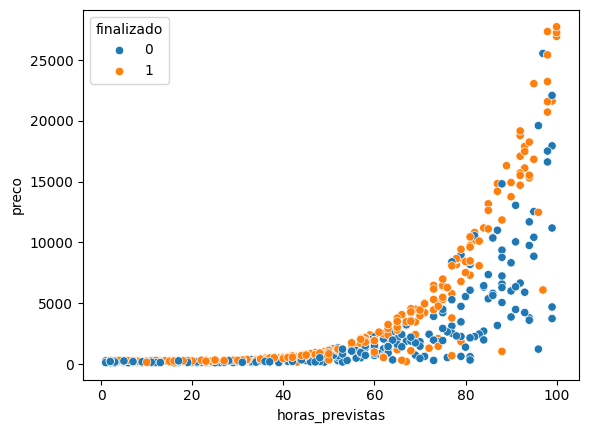

In [13]:
sns.scatterplot(x='horas_previstas', y='preco', hue=teste_y, data=teste_x)

-1.7268515859610238 1.7388670645003195 -0.5974614834809422 4.8846312657487605


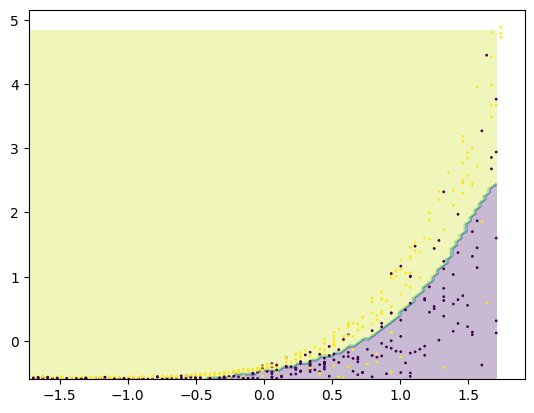

In [27]:
import numpy as np

data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=teste_y, s=1)


# DECISION BOUNDARY

### Novo Classificador SVC

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = dados[['horas_previstas', 'preco']]
y = dados['finalizado']

seed = 20
np.random.seed(seed)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, random_state=seed, test_size = 0.25, stratify=y)

print("Treinaremos com %d elementos e testaremos com %d elementos" %(len(treino_x), len (teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x) #criando o normalizador treinando com o raw_treino_x
treino_x = scaler.transform(raw_treino_x) #treino_x normalizado
teste_x = scaler.transform(raw_teste_x) #teste_x normalizado

modelo = SVC(gamma = 'auto') #Cria modelo
modelo.fit(treino_x, treino_y) #Treina
previsoes = modelo.predict(teste_x) #Teste

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acuracia foi %.2f%%" %acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acuracia foi 70.37%
